<a href="https://colab.research.google.com/github/Daivar/Deep_Learning_Models/blob/main/Flower_clasification_CNN_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 3s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/2448812029_047d981092_m.jpg'),
 PosixPath('datasets/flower_photos/roses/515121050_dcb99890be.jpg'),
 PosixPath('datasets/flower_photos/roses/3450344423_63ba3190e3.jpg'),
 PosixPath('datasets/flower_photos/roses/15699509054_d3e125286f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5292988046_a10f4b0365_n.jpg')]

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [9]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/2448812029_047d981092_m.jpg'),
 PosixPath('datasets/flower_photos/roses/515121050_dcb99890be.jpg'),
 PosixPath('datasets/flower_photos/roses/3450344423_63ba3190e3.jpg'),
 PosixPath('datasets/flower_photos/roses/15699509054_d3e125286f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5292988046_a10f4b0365_n.jpg')]

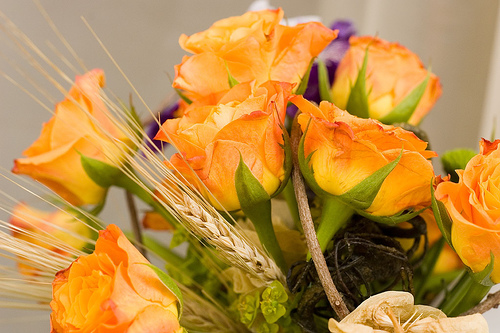

In [10]:
PIL.Image.open(str(roses[1]))

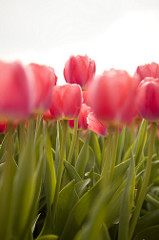

In [11]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[2]))

In [12]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [13]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [14]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/2448812029_047d981092_m.jpg'),
 PosixPath('datasets/flower_photos/roses/515121050_dcb99890be.jpg'),
 PosixPath('datasets/flower_photos/roses/3450344423_63ba3190e3.jpg'),
 PosixPath('datasets/flower_photos/roses/15699509054_d3e125286f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5292988046_a10f4b0365_n.jpg')]

In [15]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/2448812029_047d981092_m.jpg'

In [16]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[207, 153, 253],
        [159, 169, 253],
        [178, 169, 249],
        ...,
        [166, 152, 194],
        [168, 147, 196],
        [199, 163, 247]],

       [[179, 179, 243],
        [127, 194, 239],
        [140, 192, 229],
        ...,
        [  9,   3,   0],
        [  5,   0,   0],
        [167, 152, 180]],

       [[183, 175, 240],
        [131, 190, 236],
        [144, 191, 229],
        ...,
        [ 15,  17,  41],
        [  5,   3,  23],
        [170, 151, 200]],

       ...,

       [[176, 158, 219],
        [129, 148, 155],
        [134, 159, 169],
        ...,
        [222, 214, 197],
        [217, 213, 188],
        [204, 173, 236]],

       [[182, 157, 213],
        [ 90, 104,  92],
        [116, 130, 128],
        ...,
        [212, 196, 173],
        [208, 197, 165],
        [208, 169, 224]],

       [[195, 160, 240],
        [168, 156, 198],
        [172, 149, 217],
        ...,
        [202, 176, 240],
        [189, 175, 211],
        [194, 156, 255]]

In [17]:
img.shape

(240, 240, 3)

In [19]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [22]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    # print(flower_name)
    # print(len(images))
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [24]:
X = np.array(X)
y = np.array(y)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [26]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [27]:
len(X_train)

2752

In [28]:
len(X_test)

918

In [29]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=5)  # 30 epochs 0.99 Acc     

Epoch 1/5
86/86 [==============================] - 81s 923ms/step - loss: 1.2979 - accuracy: 0.4433
Epoch 2/5
86/86 [==============================] - 74s 856ms/step - loss: 0.9295 - accuracy: 0.6283
Epoch 3/5
86/86 [==============================] - 74s 864ms/step - loss: 0.7428 - accuracy: 0.7126
Epoch 4/5
86/86 [==============================] - 74s 859ms/step - loss: 0.5431 - accuracy: 0.7940
Epoch 5/5
86/86 [==============================] - 73s 853ms/step - loss: 0.3045 - accuracy: 0.8990


In [30]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 7s 246ms/step - loss: 1.0972 - accuracy: 0.6688


[1.0971759557724, 0.6688452959060669]

In [31]:
predictions = model.predict(X_test_scaled)
predictions

array([[ 8.000057  , 10.009975  , -3.489073  , -7.124573  ,  0.77096635],
       [ 8.367221  , -2.9593022 , -5.598437  , -2.0946105 ,  8.265444  ],
       [-0.45738813,  3.635627  ,  4.743569  , -5.1049085 , -0.07584206],
       ...,
       [-5.785026  , -9.056541  , -0.73012394,  9.12001   ,  1.2231758 ],
       [ 2.4949133 ,  1.9443923 ,  3.464389  , -5.2653675 , -0.19726864],
       [-4.139327  , -7.236619  ,  0.01665326,  5.843856  ,  0.574956  ]],
      dtype=float32)

In [32]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.18155226e-01, 8.81757855e-01, 1.21000505e-06, 3.19087370e-08,
       8.56838014e-05], dtype=float32)>

In [33]:
np.argmax(np.array([0,78,123,8]))

2

In [34]:
np.argmax(score)

1

In [27]:
y_test[0]

1

In [106]:
data_augmentation = keras.Sequential([
                  layers.experimental.preprocessing.RandomZoom(0.4),                  
])

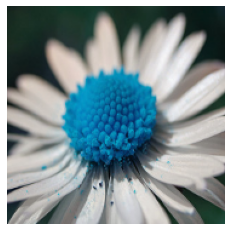

In [142]:
plt.axis('off')
plt.imshow(X[1116])

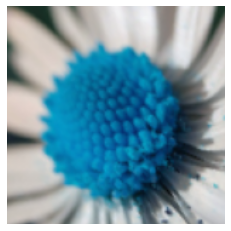

In [145]:
plt.axis('off')
plt.imshow(data_augmentation(X)[1116].numpy().astype("uint8"))

In [146]:
from tensorflow.python.keras.layers.preprocessing.image_preprocessing import RandomFlip
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers import experimental
data_augmentation = keras.Sequential([
                  # layers.experimental.preprocessing.RandomFlip("horizontal",
                                                               # input_shape=(img_height, img_width, 3)),
                  layers.experimental.preprocessing.RandomRotation(0.3),                                      
                  layers.experimental.preprocessing.RandomZoom(0.4),                  
])

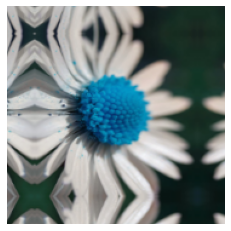

In [147]:
plt.axis('off')
plt.imshow(data_augmentation(X)[1116].numpy().astype("uint8"))

In [148]:
%%time
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 88s 1s/step - loss: 1.3862 - accuracy: 0.3884
Epoch 2/10
86/86 [==============================] - 86s 1s/step - loss: 1.0783 - accuracy: 0.5629
Epoch 3/10
86/86 [==============================] - 86s 1s/step - loss: 0.9841 - accuracy: 0.6032
Epoch 4/10
86/86 [==============================] - 87s 1s/step - loss: 0.9200 - accuracy: 0.6337
Epoch 5/10
86/86 [==============================] - 86s 1s/step - loss: 0.8973 - accuracy: 0.6450
Epoch 6/10
86/86 [==============================] - 90s 1s/step - loss: 0.8341 - accuracy: 0.6613
Epoch 7/10
86/86 [==============================] - 87s 1s/step - loss: 0.8207 - accuracy: 0.6788
Epoch 8/10
86/86 [==============================] - 87s 1s/step - loss: 0.7837 - accuracy: 0.6951
Epoch 9/10
86/86 [==============================] - 87s 1s/step - loss: 0.7671 - accuracy: 0.7042
Epoch 10/10
86/86 [==============================] - 87s 1s/step - loss: 0.7612 - accuracy: 0.7009
CPU times: user 27m

In [151]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 7s 255ms/step - loss: 0.7628 - accuracy: 0.7146


[0.762840747833252, 0.7145969271659851]